In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['heart.csv']


In [10]:
#Importing dataset
df = pd.read_csv('../input/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
df.shape

(303, 14)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [13]:
#Dataset has 14 columns consisting of 13 independant parameters and target as dependent variable
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [14]:
#Grouping data with respect to target and calculating mean
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


In [15]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

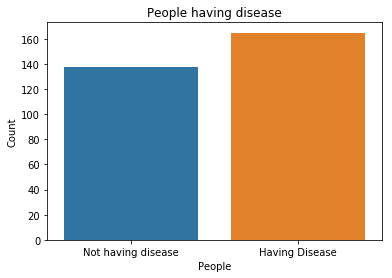

In [21]:
sns.countplot(x = 'target', data = df)
plt.title('People having disease')
plt.xlabel('People')
plt.ylabel('Count')
plt.xticks([0,1], ['Not having disease', 'Having Disease'])
plt.show()

In [34]:
count_having_disease = df.target[df.target == 1].count()
count_not_having_disease = df.target[df.target == 0].count()
percentage_having_disease = (count_having_disease/df.target.count())*100
percentage_not_having_disease = (count_not_having_disease/df.target.count())*100
print('Percentage of people having heart disease = {:.2f}%'.format(percentage_having_disease))
print('Percentage of people not having heart disease = {:.2f}%'.format(percentage_not_having_disease))

Percentage of people having heart disease = 54.46%
Percentage of people not having heart disease = 45.54%


In [35]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

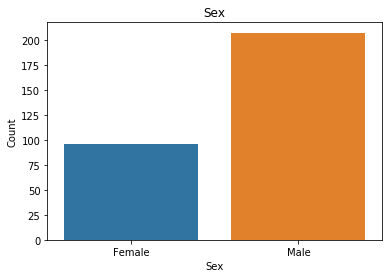

In [28]:
sns.countplot(x = 'sex', data = df)
plt.title('Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks([0,1], ['Female', 'Male'])
plt.show()

In [33]:
males = df.sex[df.sex == 1].count()
females = df.sex[df.sex == 0].count()
per_males = (males/df.sex.count())*100
per_females = (females/df.sex.count())*100
print('Percentage of males = {:.2f}%'.format(per_males))
print(' Percentage of females = {:.2f}%'.format(per_females))

Percentage of males = 68.32%
 Percentage of females = 31.68%


([<matplotlib.axis.XTick at 0x7f0a60d7d2b0>,
 <a list of 2 Text xticklabel objects>)

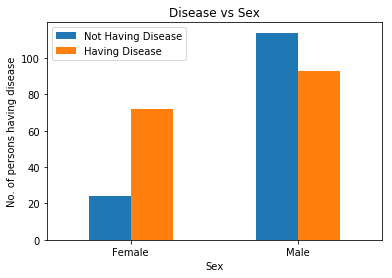

In [36]:
pd.crosstab(df.sex, df.target).plot(kind='bar')
plt.title('Disease vs Sex')
plt.legend(['Not Having Disease', 'Having Disease'])
plt.ylabel('No. of persons having disease')
plt.xlabel('Sex')
plt.xticks((0,1),['Female', 'Male'], rotation =0)

In [38]:
male_having_disease = (df.sex[(df.sex ==1) & (df.target ==1)].count()/df.sex[df.sex == 1].count()) * 100
female_having_disease = (df.sex[(df.sex ==0) & (df.target ==1)].count()/df.sex[df.sex == 0].count()) * 100
print('There are {:.2f}% male and {:.2f}% female having heart disease.'.format(male_having_disease, female_having_disease))

There are 44.93% male and 75.00% female having heart disease.


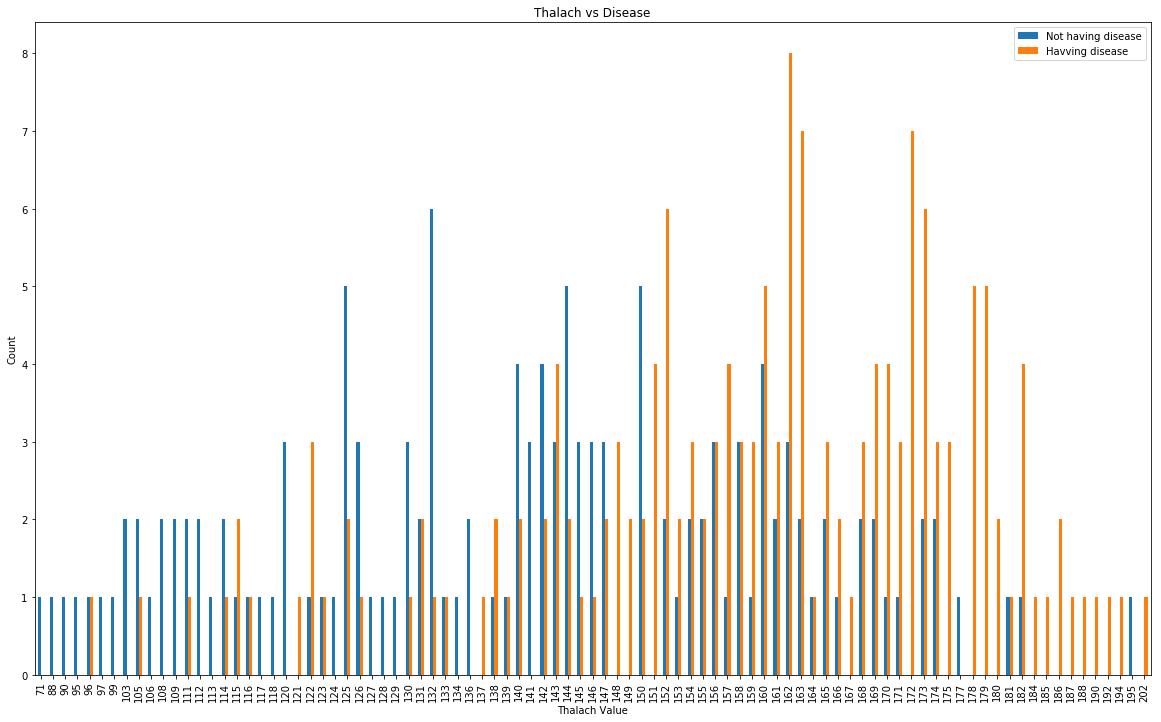

In [39]:
pd.crosstab(df.thalach, df.target).plot(kind = 'bar',figsize = (20,12))
plt.title('Thalach vs Disease')
plt.xlabel('Thalach Value')
plt.ylabel('Count')
plt.legend(['Not having disease', 'Havving disease'])
plt.show()

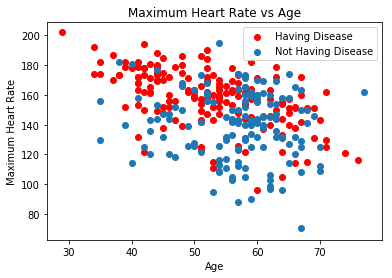

In [40]:
#Visualing the maximum heart rate along with age
plt.scatter(df.age[df.target == 1], df.thalach[df.target == 1], c = 'red')
plt.scatter(df.age[df.target == 0], df.thalach[df.target == 0])
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
plt.title('Maximum Heart Rate vs Age')
plt.legend(['Having Disease', 'Not Having Disease'])

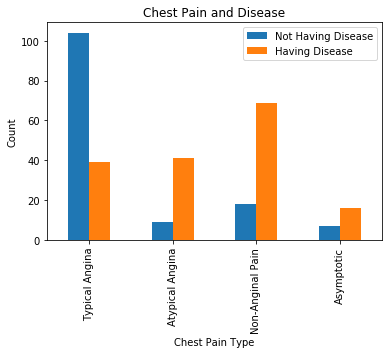

In [41]:
pd.crosstab(df.cp, df.target).plot(kind='bar')
plt.title('Chest Pain and Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(['Not Having Disease', 'Having Disease'])
plt.xticks((0,1,2,3), ['Typical Angina', 'Atypical Angina', 'Non-Anginal Pain', 'Asymptotic'], rotation=90)
plt.show()

In [42]:
chestpain = []
for i in range(0,4):
    chestpain.append((df.cp[(df.cp == i) & (df.target == 1)].count()/df.cp[df.cp == i].count())*100)
chestpain

[27.27272727272727, 82.0, 79.3103448275862, 69.56521739130434]

In [43]:
total_no_people_having_type_cp = []
for i in range(0,4):
    total_no_people_having_type_cp.append(df.cp[df.cp == i].count())

total_people_having_disease_with_cp_type = []
for i in range(0,4):
    total_people_having_disease_with_cp_type.append(df.cp[(df.cp == i) & (df.target == 1)].count())

In [44]:
CP = pd.DataFrame({'Total No. of People having Chest Pain':total_no_people_having_type_cp,
                  'Total No. of People having disease with Chest Pain':total_people_having_disease_with_cp_type,
                  'Percentage':chestpain})
CP

,Total No. of People having Chest Pain,Total No. of People having disease with Chest Pain,Percentage
0,143,39,27.272727
1,50,41,82.000000
2,87,69,79.310345
3,23,16,69.565217


In [45]:
indices = ['Typical Angina', 'Atypical Angina', 'Non-Anginal Pain', 'Asymptotic']
CP.set_index(pd.Index(indices), inplace=True)
CP

,Total No. of People having Chest Pain,Total No. of People having disease with Chest Pain,Percentage
Typical Angina,143,39,27.272727
Atypical Angina,50,41,82.000000
Non-Anginal Pain,87,69,79.310345
Asymptotic,23,16,69.565217


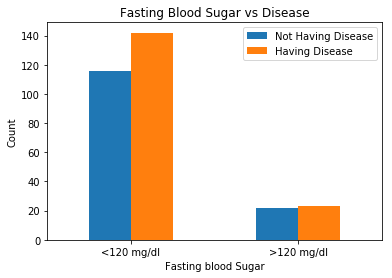

In [46]:
pd.crosstab(df.fbs, df.target).plot(kind='bar')
plt.title('Fasting Blood Sugar vs Disease')
plt.xlabel('Fasting blood Sugar')
plt.ylabel('Count')
plt.xticks((0,1), ['<120 mg/dl', '>120 mg/dl'], rotation = 0)
plt.legend(['Not Having Disease', 'Having Disease'])
plt.show()

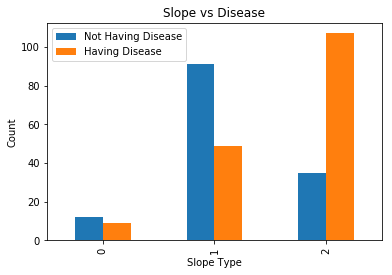

In [47]:
pd.crosstab(df.slope, df.target).plot(kind='bar')
plt.title('Slope vs Disease')
plt.xlabel('Slope Type')
plt.ylabel('Count')
plt.legend(['Not Having Disease', 'Having Disease'])
plt.show()

In [48]:
#In this data Chest pain(cp), Slope and thal are actually categorical data
#Conveting the categoraical values in dummy variable
chest = pd.get_dummies(df.cp, prefix='cp', drop_first= True) #Exluding first column in dummy varaible to avoid Dummy varaible trap 
th = pd.get_dummies(df.thal, prefix='thal', drop_first=True)
sl = pd.get_dummies(df.slope, prefix='slope', drop_first=True)

In [49]:
#Adding the all the parameters
merged = pd.concat([df, chest, th, sl], axis = 1)
merged.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cp_1,cp_2,cp_3,thal_1,thal_2,thal_3,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0,0,1,1,0,0,0,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,1,0,0,1,0,0,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,1,0,0,0,1,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,1,0,0,0,1,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0,0,0,0,1,0,0,1


In [50]:
#Dropping thal,cp,slope for data
merged.drop(['thal', 'cp', 'slope'], axis = 1, inplace=True)
merged.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,cp_1,cp_2,cp_3,thal_1,thal_2,thal_3,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,1,0,0,1,1,0,0,0,0
1,37,1,130,250,0,1,187,0,3.5,0,1,0,1,0,0,1,0,0,0
2,41,0,130,204,0,0,172,0,1.4,0,1,1,0,0,0,1,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,1,1,0,0,0,1,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,1,0,0,0,0,1,0,0,1


In [51]:
#Splitting data into independant and dependant variables
X = merged.drop('target', axis = 1)
y = merged.target
print(X.head(), y.head())

   age  sex  trestbps  chol   ...     thal_2  thal_3  slope_1  slope_2
0   63    1       145   233   ...          0       0        0        0
1   37    1       130   250   ...          1       0        0        0
2   41    0       130   204   ...          1       0        0        1
3   56    1       120   236   ...          1       0        0        1
4   57    0       120   354   ...          1       0        0        1

[5 rows x 18 columns] 0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64


In [53]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [55]:
#Splitting dataset into traing and test set
#We will split 80% data into training set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 0)

**Building machine learning models**

1. **Logistic Regression Model**

In [56]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
log_reg_acc = lr.score(X_test, y_test)
print('Logistic regression accuracy is{}'.format(lr.score(X_test, y_test)))

Logistic regression accuracy is0.8524590163934426


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


2. **KNN Model**

In [57]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
knn_acc = knn.score(X_test, y_test)
print('2-nn Classifier accuracy is {}'.format(knn.score(X_test, y_test)))

2-nn Classifier accuracy is 0.7704918032786885


In [58]:
#Checking the number of neighbors with max accuracy
score_list = []
for i in range(1, 20):
    knnn = KNeighborsClassifier(n_neighbors=i)
    knnn.fit(X_train, y_train)
    score_list.append(knnn.score(X_test, y_test))
score_list

[0.819672131147541,
 0.7704918032786885,
 0.7704918032786885,
 0.8032786885245902,
 0.8524590163934426,
 0.8524590163934426,
 0.8524590163934426,
 0.8688524590163934,
 0.8360655737704918,
 0.8524590163934426,
 0.8360655737704918,
 0.8524590163934426,
 0.8360655737704918,
 0.8524590163934426,
 0.8524590163934426,
 0.8524590163934426,
 0.8524590163934426,
 0.8688524590163934,
 0.8688524590163934]

([<matplotlib.axis.YTick at 0x7f0a611fdc50>,
 <a list of 10 Text yticklabel objects>)

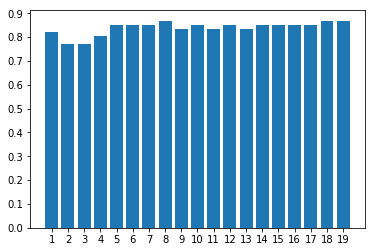

In [59]:
plt.bar(np.arange(1,20), score_list)
plt.xticks(np.arange(1,20))
plt.yticks(np.arange(0,1,.1))

In [60]:
print('Maximum score of KNN is {} and for index {}'.format(max(score_list), score_list.index(max(score_list))))

Maximum score of KNN is 0.8688524590163934 and for index 7


KNN has max accuracy of 86.88% for 8, 18 and 19 neighbors

In [61]:
knn_acc = .8688

3. **SVM Model**

In [62]:
from sklearn.svm import SVC
sv = SVC(random_state=0)
sv.fit(X_train, y_train)
svm_acc = sv.score(X_test, y_test)
print('SVC Accuracy is {}'.format(sv.score(X_test, y_test)))

SVC Accuracy is 0.8688524590163934


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


4. **Decision Tree Model**

In [63]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy', random_state=0)
dt.fit(X_train, y_train)
dt_acc = dt.score(X_test, y_test)
print('Decision Tree Accuracy is {}'.format(dt.score(X_test, y_test)))

Decision Tree Accuracy is 0.7868852459016393


5. **Random Forest Classification Model**

In [64]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1000, criterion='entropy', random_state=0)
rfc.fit(X_train, y_train)
rfc_acc = rfc.score(X_test, y_test)
print('RFC Accuracy is {}'.format(rfc.score(X_test, y_test)))

RFC Accuracy is 0.8360655737704918


6. **Naive Bayes Model**

In [65]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_acc = nb.score(X_test, y_test)
print('NaiveBayes Accuracy is {}'.format(nb.score(X_test, y_test)))

NaiveBayes Accuracy is 0.8852459016393442


**Comparing Models**

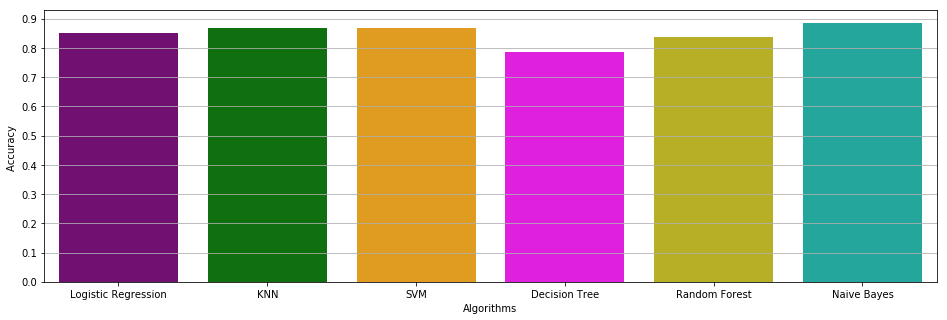

In [75]:
models = ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree', 'Random Forest', 'Naive Bayes']
accuracy = [log_reg_acc, knn_acc, svm_acc, dt_acc, rfc_acc, nb_acc]
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

plt.figure(figsize=(16,5))
plt.ylabel("Accuracy ")
plt.xlabel("Algorithms")
plt.yticks(np.arange(0,2,.1))
plt.grid()
sns.barplot(x=models, y=accuracy, palette=colors)
plt.show()